Задание для практических работ:

# Задание 1. 
Для выбранного и предобработанного датасета из лабораторной работы 1, учитывая особенности моделей:

Произвести классификацию используя:
## 1. Наивный баессовский классификатор

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
# Загрузить данные
df = pd.read_csv("pokemonGO.csv")
features = df[['MaxHP']]
print(features.values)
# Создать вектор бинарных целей
target = df['Type 1']
# Создать объект бернуллиева наивного Байеса с априорными вероятностями каждого класса 
clf = BernoulliNB()
# Натренировать модель
model = clf.fit(features, target)
# Создать новое наблюдение
new_observation = [[80],[85],[90],[87],[77],[95],[82],[100],[96],[84]]
# Предсказать класс
model.predict(new_observation)
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

[[ 83]
 [107]
 [138]
 [ 73]
 [103]
 [135]
 [ 81]
 [105]
 [137]
 [ 83]
 [ 91]
 [107]
 [ 75]
 [ 83]
 [115]
 [ 75]
 [111]
 [143]
 [ 59]
 [ 99]
 [ 75]
 [115]
 [ 67]
 [107]
 [ 67]
 [107]
 [ 91]
 [130]
 [ 99]
 [122]
 [154]
 [ 84]
 [108]
 [140]
 [122]
 [162]
 [ 72]
 [127]
 [194]
 [233]
 [ 75]
 [130]
 [ 83]
 [107]
 [130]
 [ 67]
 [107]
 [107]
 [122]
 [ 27]
 [ 67]
 [ 75]
 [115]
 [ 91]
 [138]
 [ 75]
 [115]
 [ 99]
 [154]
 [ 75]
 [115]
 [154]
 [ 51]
 [ 75]
 [ 99]
 [122]
 [138]
 [154]
 [ 91]
 [115]
 [138]
 [ 75]
 [138]
 [ 75]
 [ 99]
 [138]
 [ 91]
 [115]
 [154]
 [162]
 [ 51]
 [ 91]
 [ 94]
 [ 67]
 [107]
 [115]
 [154]
 [138]
 [178]
 [ 59]
 [ 91]
 [ 59]
 [ 83]
 [107]
 [ 67]
 [107]
 [146]
 [ 59]
 [ 99]
 [ 75]
 [107]
 [107]
 [162]
 [ 91]
 [107]
 [ 91]
 [ 91]
 [154]
 [ 75]
 [115]
 [138]
 [178]
 [408]
 [115]
 [178]
 [ 59]
 [ 99]
 [ 83]
 [138]
 [ 59]
 [107]
 [ 75]
 [122]
 [115]
 [115]
 [115]
 [115]
 [130]
 [ 43]
 [162]
 [218]
 [ 88]
 [ 99]
 [218]
 [115]
 [115]
 [115]
 [ 67]
 [122]
 [ 59]
 [107]
 [138]
 [265]

/home/andor/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


## 2. Метод k-ближайших соседей 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(df[['MaxHP']], df['Type 1'], random_state=0)
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
X_new = np.array([[80],[85],[90],[87],[77],[95],[82],[100],[96],[84]])
print("форма массива X_new: {}".format(X_new.shape))
#Делаем прогноз
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

форма массива X_new: (10, 1)
Прогноз: ['Bug' 'Bug' 'Fighting' 'Bug' 'Fire' 'Normal' 'Bug' 'Fire' 'Normal' 'Bug']
Правильность на тестовом наборе: 0.05


/home/andor/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## 3. Метод опорных векторов

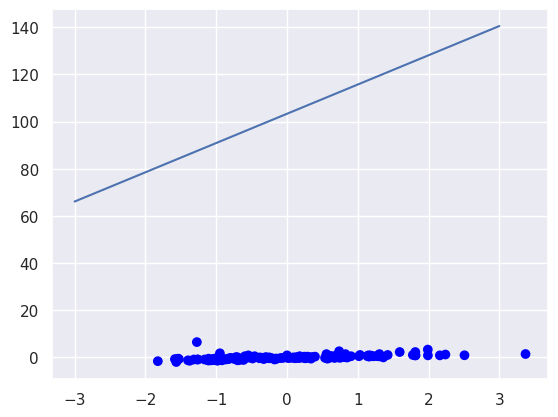

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Воспользуемся настройками по умолчанию библиотеки Seaborn
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC
sns.set()
# Загрузить данные всего с двумя классами и двумя признаками 
features = df[['MaxCP','MaxHP']]
target = df['Type 1']
# Стнадартизировать признаки 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Создать опорно-векторный классификатор 
svc = LinearSVC(C=1.0)
# Натренировать модель
model = svc.fit(features_standardized, target)

# Вывести точки данных на график и расцветить, используя их класс 
color = ["red" if C == 10 else "blue" for C in target] 
plt.scatter(features_standardized[:,-0], features_standardized[:,1], c=color)

# Создать гиперплоскость 
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(3, -3)
yy = a * xx-(svc.intercept_[0]) / w[1]

# Начертить гиперплоскость 
plt.plot(xx, yy)
plt.show ()

## 4. Деревья решений и случайные леса

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


X, y = df(n_samples=100, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

TypeError: 'DataFrame' object is not callable

# Задание 2. 
На наборе данных Boston Housing https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset сравнить работу алгоритмов линейной регрессии, гребневой регрессии (L2 -регуляризации), лассо-регрессии (L1 регуляризации )

# Задание 3. 
Используя набор данных Breast Cancer Wisconsin (Diagnostic) Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data  сравнить работу алгоритмов k-средних, DBSCAN и агломеративной кластеризации